# theano tutorial

this jupyter notebook is just  follow Theano_Tutorial by k-kawakami
(https://github.com/k-kawakami/Theano_Tutorial/blob/master/Theano_Tutorial.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict

import numpy
import theano
import theano.tensor as T

from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score

#Random Seed
rng = numpy.random.RandomState(1234)

mnist = fetch_mldata('MNIST original', data_home = "~/Scripts/theano_tutorial")

# mnist_x is a (n_sample, n_feature=784) matrix
mnist_x, mnist_y = mnist.data.astype("float32")/255.0, mnist.target.astype("int32")

/Users/K/anaconda2/envs/gci/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


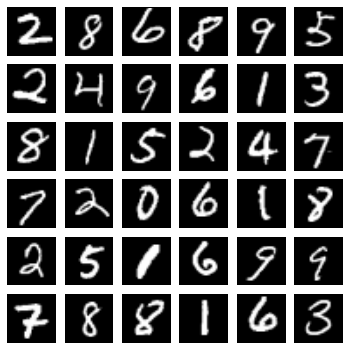

In [2]:
## Show Randomly picked Examples
def plot_sample(x, axis):
    img = x.reshape(28, 28)
    axis.imshow(img, cmap='gray')
    
fig = plt.figure(figsize=(6, 6))
for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    plot_sample(mnist_x[numpy.random.randint(0,60000)], ax)

/Users/K/anaconda2/envs/gci/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/Users/K/anaconda2/envs/gci/lib/python2.7/site-packages/nolearn/lasagne/base.py:260: UserWarning: The 'eval_size' argument has been deprecated, please use the 'train_split' parameter instead, e.g.
train_split=TrainSplit(eval_size=0.4)
  warn("The 'eval_size' argument has been deprecated, please use "


# Neural Network with 648010 learnable parameters

## Layer information

  #  name     size
---  -------  -------
  0  input    1x28x28
  1  hidden1  500
  2  hidden2  500
  3  output   10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  -----
      1     0.77409     6.46867    0.11967      0.09940  6.07s
      2     0.97977     2.93552    0.33376      0.11625  7.58s
      3     0.92615     3.10960    0.29783      0.15117  5.05s
      4     0.84629     3.25830    0.25973      0.17866  5.27s
      5     0.88487     1.98023    0.44685      0.32455  5.46s
      6     0.75252     1.62683    0.46257      0.48236  6.67s
      7     0.70238     4.34925    0.16149      0.34219  5.49s
      8     0.84670     3.55248    0.23834      0.33583  5.87s
      9     0.83084     2.13768    0.38867      0.43330  6.47s
     10     0.70716     2.48853    0.28417      0.47101  6.09s
     11     0.66751     2.40164    0.27794      0.40460 

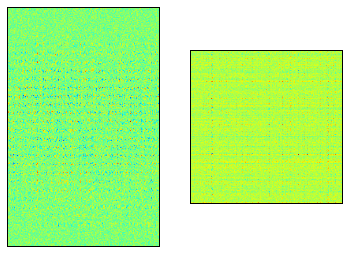

In [3]:
from lasagne import layers
from lasagne import nonlinearities
from nolearn.lasagne import NeuralNet

network = NeuralNet(
    #Define Layers
    layers=[
        ('input', layers.InputLayer),
        #('conv', layers.Conv2DLayer),
        #('pool', layers.MaxPool2DLayer),
        ('hidden1', layers.DenseLayer),
        #('dropout', layers.DropoutLayer),
        ('hidden2', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    #Hidden Unit Size, Activation Function
    input_shape=(None, 1, 28, 28),
    #conv_num_filters=5, conv_filter_size=(3, 3), pool_pool_size=(2, 2),
    hidden1_num_units=500, #854 
    hidden1_nonlinearity=nonlinearities.tanh,
    #dropout_p = 0.5,
    hidden2_num_units=500,
    output_num_units=10, 
    output_nonlinearity=nonlinearities.softmax,

    # learning rate parameters
    update_learning_rate=0.01,
    update_momentum=0.9,
    regression=False,
    max_epochs=50,
    verbose=1,

    # Training test-set split
    eval_size = 0.2
)

#Learn Parameters
X = mnist_x.reshape(-1, 1, 28, 28) # Reshape sample to 2D image to feed in nolearn.
y = mnist_y
net = network.fit(X, y)

#Visualize weights
weights = network.get_all_params()
hidden1_weight = weights[0].get_value()
hidden2_weight = weights[2].get_value()
#plt.imshow(hidden1_weight)
fig = plt.figure(figsize=(6, 6))
fig.add_subplot(121, xticks=[], yticks=[]).imshow(hidden1_weight)
fig.add_subplot(122, xticks=[], yticks=[]).imshow(hidden2_weight)

## overview of theano code

1. define symbolic/shared variables (Variables)

2. construct a computational graph(math)

3. complie the graph(function)

4. run!

In [6]:
# Linear Regression
import numpy
import theano
import theano.tensor as T

## step1.define symbolic/shared variables
x,t = T.fvector("x"), T.fvector("t") # input

#variables that are shared over iteration: weight, bias
W = theano.shared(rng.uniform(low=-0.08,high=0.08, size=(5, 3)), name="W") 
b =  theano.shared(numpy.zeros(3), name="bias")

## step2. define graph
y= T.dot(x, W) + b

# cost function
cost = T.sum((y-t)**2) 

# take gradient
gW,gb = T.grad(cost, [W, b])

# set update expression in orderdict
updates = OrderedDict({W: W-0.01*gW, b:b-0.01*gb})

# step3. compile graph
f = theano.function(inputs = [x,t], outputs = [cost, gW, gb], updates = updates , allow_input_downcast = True)

# step4. run!
for epoch in range(5):
    cost, gW, gb = f([-2., -1., 1., 2., 3.,], [.4,.3,.5])
    print "epoch:: %d, cost:: %.3f"%(epoch, cost)

epoch:: 0, cost:: 0.924
epoch:: 1, cost:: 0.333
epoch:: 2, cost:: 0.120
epoch:: 3, cost:: 0.043
epoch:: 4, cost:: 0.016


## わかってない内容

- 1.　T.fvectorの内容

- 3. functionの内容

## Variables

In addition to numpy.ndarray, you need to know Symbolic Variables and Shared Variables

- Symbolic Variable is a symbolic representation of quantities you want to use in functions.(Inputs)

- Shared Variable is a variable with storage that is shared between functions. (Weights, Data)

In [10]:
# Symbolic  Variables
## integer
a = T.iscalar("a")
## float scalar
b = T.fscalar("b")

# float vector
x = T.fvector("x")
# float matrix
X = T.fmatrix("X")

#shared variable, store variables on cpu/gpu memory
W = theano.shared(numpy.array([0.,1.,2., 3., 4.]).astype("float32"), name = "W")
bias = theano.shared(numpy.float32(5), name = "bias")

# get value from shared variables
print W.get_value()

## define symbolic graph
c = a +b
y = T.dot(x,W) +  bias

# print symbolic graph
print theano.pp(y)

## replace "b" with "y"
d = theano.clone(output = c, replace={b:y})
print theano.pp(d)

[ 0.  1.  2.  3.  4.]
((x \dot W) + bias)
(a + ((x \dot W) + bias))


## Function

complie symbolic graph into a function

In [11]:
## compile symbolic graph into callable functions
add = theano.function(inputs = [a,b], outputs = c)
linear = theano.function(inputs = [x], outputs = y)

# call function
print add(1,5)
print linear([0.,0.,0.,0.,1.]).astype("float32")

## print function
theano.printing.debugprint(linear)

# evaluate symbolic graph without compilation
print c.eval({
        a:numpy.int32(16),
        b:numpy.float32(12.10)
    })

6.0
9.0
Elemwise{Add}[(0, 0)] [id A] ''   4
 |InplaceDimShuffle{} [id B] ''   3
 | |CGemv{inplace} [id C] ''   2
 |   |AllocEmpty{dtype='float32'} [id D] ''   1
 |   | |TensorConstant{1} [id E]
 |   |TensorConstant{1.0} [id F]
 |   |InplaceDimShuffle{x,0} [id G] ''   0
 |   | |W [id H]
 |   |x [id I]
 |   |TensorConstant{0.0} [id J]
 |bias [id K]
28.1000003815


## Math
most mathmatic operations are similar to numpy. However, comparison operations have special form.

condtition operation is

```
T.switch(condition, if true, if false)
```

comparison is 

```
T.ge(a,b)
```

In [16]:
x = T.fvector("x")

### Basic Math operation & Activation funcsions
exp_x = T.exp(x)
sigmoid_x = T.nnet.sigmoid(x)
tanh_x = T.tanh(x)

### Advanced:: condition and comparison
relu_x = T.switch(T.gt(x, 0), x, 0)

f = theano.function([x], [exp_x, sigmoid_x, tanh_x, relu_x])
f(numpy.array([-2., -1., 1., 2., 3.]).astype("float32"))

[array([  0.13533528,   0.36787945,   2.71828175,   7.38905621,  20.08553696], dtype=float32),
 array([ 0.11920292,  0.26894143,  0.7310586 ,  0.88079709,  0.95257413], dtype=float32),
 array([-0.96402758, -0.76159418,  0.76159418,  0.96402758,  0.99505478], dtype=float32),
 array([ 0.,  0.,  1.,  2.,  3.], dtype=float32)]

何してるのかわからない

##  Gradient (Automatic Differentiation)

you can define gradient symbolically. 

you can ues theano.gradient, theano.jacobian, thano.gradient.hessian

In [17]:
x = T.fscalar("x")
y = x**2

gy = theano.grad(cost = y, wrt = x)

f = theano.function([x], [y, gy])
print f(10)

[array(100.0, dtype=float32), array(20.0, dtype=float32)]


### update parameters(shared variables)

In [19]:
### define a function which update by 1 for each call.

t = theano.shared(numpy.int32(0))

# ordereddict({before update: after update})
increment = theano.function([], t, updates = OrderedDict({t:t+1}))
for i in range(5):
    t = increment()
    print t

0
1
2
3
4


In [27]:
# Linear Regression
from collections import OrderedDict
rng = numpy.random.RandomState(1234)

##  Step1. Define Symbolic / Shared Variables
x, t = T.fvector("x"), T.fvector("t") #inputs


W = theano.shared(rng.uniform(low=-0.08,high=0.08, size=(5, 3)), name="W") #variables that are shared over iterations
b =  theano.shared(numpy.zeros(3), name="bias")


## Step2. Define graph
y = T.dot(x, W) + b
#y = T.nnet.sigmoid(T.dot(x, W) + b)
#y = T.tanh(T.dot(x, W) + b)
cost = T.sum((y - t)**2)


gW, gb = T.grad(cost, [W, b]) # Take gradient

updates =  OrderedDict({W: W-0.01*gW, b: b-0.01*gb}) # Set update expression in OrderedDict


## Step3. Compile graph
f = theano.function(inputs=[x, t], outputs=[cost, gW, gb], updates=updates, allow_input_downcast=True)

## Step4. Run!!
for epoch in range(5):
    cost, gW, gb = f([-2., -1., 1., 2., 3.], [.4, .3, .5])
    print "epoch:: %d, cost:: %.3f"%(epoch, cost)

epoch:: 0, cost:: 0.295
epoch:: 1, cost:: 0.106
epoch:: 2, cost:: 0.038
epoch:: 3, cost:: 0.014
epoch:: 4, cost:: 0.005


In [28]:
#Multi Layer Perceptron
class Layer:
    def __init__(self, in_dim, out_dim, function):
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.function = function

        self.W = theano.shared(
                                                    rng.uniform(
                                                                low=-0.08, 
                                                                high=0.08, 
                                                                size=(in_dim, out_dim)
                                                    ).astype("float32"), name="W")
        self.b =  theano.shared(numpy.zeros(out_dim).astype("float32"), name="bias")
        
        self.params = [ self.W, self.b ]

    def fprop(self, x):
        h = self.function(T.dot(x, self.W)+self.b)
        self.h = h
        return h 

In [29]:
train_x, valid_x, train_y, valid_y = train_test_split(mnist_x, mnist_y, test_size=0.2, random_state=42)

In [30]:
x, t = T.fmatrix("x"), T.ivector("t")
activation = T.nnet.sigmoid #T.tanh

layers = [
    Layer(784, 500, activation),
    Layer(500, 500, activation),
    Layer(500, 500, activation),
    Layer(500, 10, T.nnet.softmax)
]

## Collect Parameters and Symbolic output
params = []
for i, layer in enumerate(layers):
    params += layer.params
    if i == 0:
        layer_out = layer.fprop(x)
    else:
        layer_out = layer.fprop(layer_out)

        
## Cost Function (Negative Log Likelihood)
y = layers[-1].h
cost = - T.mean((T.log(y))[T.arange(x.shape[0]), t])


## Gradient
gparams = T.grad(cost, params)
gmomentums = [theano.shared(numpy.zeros_like(param.get_value(borrow=True)).astype("float32")) for param in params]
updates = OrderedDict()


## Defile Learning Rule, you can add Adagrad, Adadelta etc.
lr, momentum = numpy.float32(0.1), numpy.float32(0.9)

for param, gparam, gmomentum in zip(params, gparams, gmomentums,):
    #Clip gradient
    #gparam = theano.gradient.grad_clip(gparam, lower_bound=-5, upper_bound=5)

    # sgd
    #updates[param] = param - lr * gparam

    # momentum
    updates[gmomentum] = momentum * gmomentum - lr * gparam
    updates[param] = param + updates[gmomentum]

              
## Compile 
train = theano.function([x,t],cost,updates=updates)
test = theano.function([x,t],[cost, T.argmax(y, axis=1)])

## Iterate
batch_size = 100
nbatches = train_x.shape[0]//batch_size
for epoch in range(50):
    train_x, train_y = shuffle(train_x, train_y)  # Shuffle Samples !!
    for i in range(nbatches):
            start = i * batch_size
            end = start + batch_size
            train(train_x[start:end], train_y[start:end])
    valid_cost, pred = test(valid_x, valid_y)
    if (epoch + 1) % 10 == 0:
        print "EPOCH:: %i, Validation cost: %.3f, Validation F1: %.3f"%(epoch+1, valid_cost, f1_score(valid_y, pred, average="macro"))

EPOCH:: 10, Validation cost: 0.098, Validation F1: 0.970
EPOCH:: 20, Validation cost: 0.088, Validation F1: 0.976
EPOCH:: 30, Validation cost: 0.091, Validation F1: 0.979
EPOCH:: 40, Validation cost: 0.097, Validation F1: 0.980
EPOCH:: 50, Validation cost: 0.101, Validation F1: 0.980
